In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report

import warnings
warnings.filterwarnings('ignore')


In [4]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/diabetes.csv')
data.shape

(768, 9)

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [8]:
data.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [9]:
# anlyze the target variable/
round(data['Outcome'].value_counts(normalize = True)*100,2)

,proportion
Outcome,
0,65.1
1,34.9


In [10]:
# Preparing the data for ML model without oversampling

x = data.drop(['Outcome'],axis = 1)
y = data['Outcome']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

# Data scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [12]:
# Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(x_train_scaled, y_train)
print("Training accuracy: ", round(logreg_model.score(x_train_scaled,y_train)*100,2),'%')

Training accuracy:  77.04 %


Testing acccuracy:  75.32 %
Classificaiton Report: 

               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



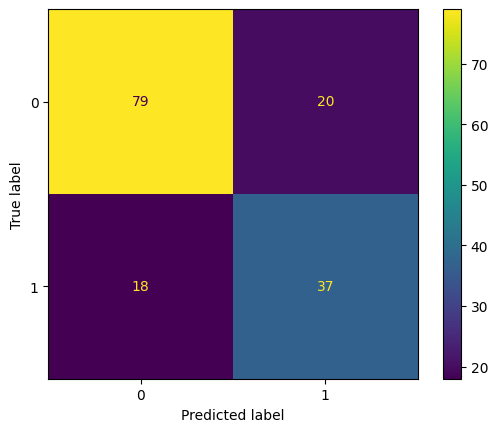

In [13]:
# Model testing
y_pred = logreg_model.predict(x_test_scaled)

# metrics
print('Testing acccuracy: ',round(accuracy_score(y_test,y_pred)*100,2),'%')
cm = ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
print('Classificaiton Report: \n\n',classification_report(y_test,y_pred))

In [14]:
# Resampling
smote = SMOTE()
x_train_smote, y_train_smote = smote.fit_resample(x_train_scaled,y_train)


In [15]:
# data distribution after resampling
round(y_train_smote.value_counts(normalize = True)*100,2)

,proportion
Outcome,
0,50.0
1,50.0


In [16]:
# Logistic Regression with resampling
logreg_model_sm = LogisticRegression(random_state = 42)
logreg_model_sm.fit(x_train_smote,y_train_smote)
print('Training Accuracy: ',round(logreg_model_sm.score(x_train_smote,y_train_smote)*100,2),'%')

Training Accuracy:  77.31 %


Testing accuracy:  69.48 %
Classification Report: 

               precision    recall  f1-score   support

           0       0.81      0.69      0.74        99
           1       0.56      0.71      0.62        55

    accuracy                           0.69       154
   macro avg       0.68      0.70      0.68       154
weighted avg       0.72      0.69      0.70       154



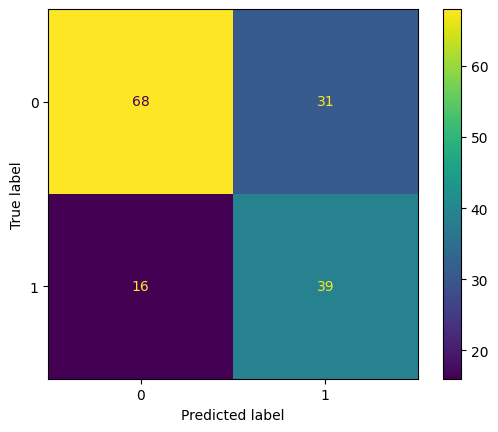

In [21]:
# Model testing
y_pred_sm = logreg_model_sm.predict(x_test_scaled)

# metrics
print('Testing accuracy: ',round(accuracy_score(y_test,y_pred_sm)*100,2),'%')
cm = ConfusionMatrixDisplay.from_predictions(y_test,y_pred_sm)
print('Classification Report: \n\n',classification_report(y_test,y_pred_sm))